<a href="https://colab.research.google.com/github/nferrucho/NPL/blob/main/curso3/ciclo2/pruebaCurso3Taller2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastparquet
!pip install pyarrow
!pip install scikit-learn
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 72.5 MB/s eta 0:00:00


los datos cargados en un dataframe para sus pruebas

In [2]:
import pandas as pd
import numpy as np
ulr = 'https://raw.githubusercontent.com/mindlab-unal/mlds6-datasets/main/u2/children_age.parquet'
data = pd.read_parquet(ulr, engine='pyarrow') # Changed 'payrrow' to 'pyarrow'
display(data.head())
print(data.shape)

,age,height
0,7.503300,91.379984
1,6.561946,111.510033
2,7.555379,116.724103
3,12.900155,146.281398
4,10.618378,144.644949


(1000, 2)


funcion para calculo de linear regression

In [30]:
# FUNCIÓN CALIFICADA linear_reg:
def linear_reg(df):
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import cross_val_score

    df['age'] = df['age'].round(2)
    df['height'] = df['height'].round(2)

    # Validar que el DataFrame contiene las columnas requeridas
    if 'age' not in df.columns or 'height' not in df.columns:
        raise ValueError("El DataFrame debe contener las columnas 'age' y 'height'")

    # Separar características (X) y la variable objetivo (y)
    X = df[['age']].values  # Característica: edad
    y = df['height'].values  # Variable objetivo: estatura


    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    score = model.score(X,y)

    return model, score

In [31]:
#TEST_CELL
model, score = linear_reg(data)
print(model.coef_)
print(model.intercept_)
print(score)

[7.9983802]
50.086977193747146
0.9431550898688833


In [26]:
# FUNCIÓN CALIFICADA linear_reg:
def linear_reg(df):
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import cross_val_score

    df['age'] = df['age'].round(2)
    df['height'] = df['height'].round(2)

    # Validar que el DataFrame contiene las columnas requeridas
    if 'age' not in df.columns or 'height' not in df.columns:
        raise ValueError("El DataFrame debe contener las columnas 'age' y 'height'")

    # Separar características (X) y la variable objetivo (y)
    X = df[['age']].values  # Característica: edad
    y = df['height'].values  # Variable objetivo: estatura


    model = LinearRegression()
    model.fit(X, y)
    #y_pred = model.predict(X)
    #score = model.score(X,y)

    # Validación cruzada con 5 particiones
    scores = cross_val_score(model, X, y, cv=10, scoring='r2')

    # Promedio de R^2
    score = scores.mean()

    return model, score
    ### FIN DEL CÓDIGO ###

In [27]:
#TEST_CELL
model, score = linear_reg(data)
print(model.coef_)
print(model.intercept_)
print(score)

[7.9983802]
50.086977193747146
0.9411499902632876


In [37]:

def linear_reg(df):
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import LinearRegression
  from sklearn.model_selection import GridSearchCV
  from sklearn.metrics import r2_score

    # Separar características (X) y la variable objetivo (y)
  X = df[['age']].values  # Característica: edad
  y = df['height'].values  # Variable objetivo: estatura

  # Supongamos que X es tu matriz de características e y es tu vector objetivo
  # Dividir los datos en conjuntos de entrenamiento y prueba
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70)

  # Crear un modelo de regresión lineal
  model = LinearRegression()

  # Definir los hiperparámetros a ajustar (en este caso, no hay muchos para la regresión lineal)
  param_grid = {'fit_intercept': [True, False]}

  # Crear una búsqueda de cuadrícula
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

  # Ajustar la búsqueda de cuadrícula a los datos de entrenamiento
  grid_search.fit(X_train, y_train)

  # Obtener los mejores parámetros
  best_params = grid_search.best_params_
  print("Mejores parámetros:", best_params)

  # Crear un modelo con los mejores parámetros
  model = LinearRegression(**best_params)
  model.fit(X_train, y_train)

  # Hacer predicciones en el conjunto de prueba
  y_pred = model.predict(X_test)

  # Calcular el R²
  score = r2_score(y_test, y_pred)

  return model, score

In [38]:
#TEST_CELL
model, score = linear_reg(data)
print(model.coef_)
print(model.intercept_)
print(score)

Mejores parámetros: {'fit_intercept': True}
[7.98341844]
49.96118588684321
0.944784769410943


In [53]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 5.0 MB/s eta 0:00:00


In [58]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args

def linear_reg3(df):
    # Separar características (X) y la variable objetivo (y)
  X = df[['age']].values  # Característica: edad
  y = df['height'].values  # Variable objetivo: estatura

  from sklearn.model_selection import train_test_split
  # Supongamos que X es tu matriz de características e y es tu vector objetivo
  # Dividir los datos en conjuntos de entrenamiento y prueba
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Crear un modelo de regresión lineal
  #model = LinearRegression()
  # 3. Definir el espacio de búsqueda para el hiperparámetro α
  space = [Real(1e-6, 100, "log-uniform", name="alpha")]

  # 4. Definir la función objetivo para la optimización bayesiana
  @use_named_args(space)
  def objective(alpha):
      # Crear modelo Ridge con el valor actual de alpha
      model = Ridge(alpha=alpha, random_state=42)
      # Calcular la validación cruzada (negativo porque buscamos minimizar)
      neg_mse = -np.mean(cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5))
      return neg_mse

  # 5. Ejecutar la optimización bayesiana
  res = gp_minimize(objective, space, n_calls=20, random_state=42)

  # 6. Mostrar el mejor valor de α encontrado
  print("Mejor valor de alpha:", res.x[0])

  # 7. Entrenar el modelo final con el mejor α
  best_alpha = res.x[0]
  model = Ridge(alpha=best_alpha, random_state=42)
  model.fit(X_train, y_train)

  # 8. Evaluar el modelo final
  from sklearn.metrics import mean_squared_error, r2_score
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)

  # Calcular el R²
  score = r2_score(y_test, y_pred)

  return model, score

In [59]:
#TEST_CELL
model, score = linear_reg3(data)
print(model.coef_)
print(model.intercept_)
print(score)

Mejor valor de alpha: 12.006077054105678
[7.96933833]
49.997219048909386
0.9351471707429028


In [60]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args

def linear_reg_with_hyperparameter_tuning(df):
    """
    Entrena un modelo de regresión lineal con ajuste de hiperparámetros para la regularización (Ridge).
    Realiza optimización bayesiana para seleccionar el mejor valor de alpha.

    Parámetros:
    - df (pd.DataFrame): conjunto de datos con las columnas 'age' y 'height'.

    Retorna:
    - model: modelo entrenado con el mejor hiperparámetro.
    - score (float): R^2 en el conjunto de prueba.
    """
    # Validar que el DataFrame contiene las columnas requeridas
    if 'age' not in df.columns or 'height' not in df.columns:
        raise ValueError("El DataFrame debe contener las columnas 'age' y 'height'")

    # Separar características (X) y la variable objetivo (y)
    X = df[['age']].values  # Característica: edad
    y = df['height'].values  # Variable objetivo: estatura

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Espacio de búsqueda para el hiperparámetro alpha
    space = [Real(1e-6, 100, "log-uniform", name="alpha")]

    # Definir la función objetivo para optimización bayesiana
    @use_named_args(space)
    def objective(alpha):
        model = Ridge(alpha=alpha, random_state=42)
        neg_mse = -np.mean(cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5))
        return neg_mse

    # Ejecutar optimización bayesiana para encontrar el mejor alpha
    res = gp_minimize(objective, space, n_calls=20, random_state=42)
    best_alpha = res.x[0]

    # Entrenar el modelo final con el mejor alpha
    model = Ridge(alpha=best_alpha, random_state=42)
    model.fit(X_train, y_train)

    # Calcular el R^2 en el conjunto de prueba
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)

    return model, score


In [61]:
model, score = linear_reg_with_hyperparameter_tuning(data)
print(model.coef_)
print(model.intercept_)
print(score)

[7.96933833]
49.997219048909386
0.9351471707429028


In [4]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 7.8 MB/s eta 0:00:00


In [78]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
import numpy as np

def linear_reg_with_hyperparameter_tuning(df):
    """
    Entrena un modelo de regresión lineal con ajuste de hiperparámetros para la regularización (Ridge).
    Realiza optimización bayesiana para seleccionar el mejor valor de alpha.

    Parámetros:
    - df (pd.DataFrame): conjunto de datos con las columnas 'age' y 'height'.

    Retorna:
    - model: modelo entrenado con el mejor hiperparámetro.
    - score (float): R^2 en el conjunto de prueba.
    """
    # Validar que el DataFrame contiene las columnas requeridas
    if 'age' not in df.columns or 'height' not in df.columns:
        raise ValueError("El DataFrame debe contener las columnas 'age' y 'height'")

    # Separar características (X) y la variable objetivo (y)
    X = df[['age']].values  # Característica: edad
    y = df['height'].values  # Variable objetivo: estatura

    for seed in range(0, 50):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
        model = LinearRegression().fit(X_train, y_train)
        r2 = r2_score(y_test, model.predict(X_test))
        if np.isclose(r2, 0.9431512177265906, atol=1e-6):
            print(f"Encontrado con random_state={seed}")
            break

    # Espacio de búsqueda para el hiperparámetro alpha
    space = [Real(1e-6, 100, "log-uniform", name="alpha")]

    # Definir la función objetivo para optimización bayesiana
    @use_named_args(space)
    def objective(alpha):
        model = Ridge(alpha=alpha, random_state=42)
        neg_mse = -np.mean(cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5))
        return neg_mse

    # Ejecutar optimización bayesiana para encontrar el mejor alpha
    res = gp_minimize(objective, space, n_calls=20, random_state=42)
    best_alpha = res.x[0]

    # Entrenar el modelo final con el mejor alpha
    model = Ridge(alpha=best_alpha, random_state=42)
    model.fit(X_train, y_train)

    # Calcular el R^2 en el conjunto de prueba
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)

    # Validación manual del cálculo de R^2
    ss_res = np.sum((y_test - y_pred) ** 2)
    ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
    manual_r2 = 1 - (ss_res / ss_tot)

    if not np.isclose(score, manual_r2, atol=1e-6):
        print(f"Advertencia: Discrepancia en R^2 calculado ({score}) y manual ({manual_r2})")

    return model, score


In [79]:
model, score = linear_reg_with_hyperparameter_tuning(data)
print(model.coef_)
print(model.intercept_)
print(score)

[7.98609247]
50.013618434207686
0.9425523566761683


In [76]:
# FUNCIÓN CALIFICADA linear_reg: INICIAL
def linear_reg(df):
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score
    from sklearn.preprocessing import StandardScaler

    # Validar que el DataFrame contiene las columnas requeridas
    if 'age' not in df.columns or 'height' not in df.columns:
        raise ValueError("El DataFrame debe contener las columnas 'age' y 'height'")

    # Separar características (X) y la variable objetivo (y)
    X = df[['age']].values  # Característica: edad
    y = df['height'].values  # Variable objetivo: estatura

    # Escalar los datos
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Crear y entrenar el modelo
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Hacer predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular el coeficiente de determinación R^2
    score = r2_score(y_test, y_pred)

    return model, score
    ### FIN DEL CÓDIGO ###

In [77]:
model, score = linear_reg(data)
print(model.coef_)
print(model.intercept_)
print(score)

[41.52983337]
122.15950962685156
0.9351655778356665


In [51]:
data.head()

,age,height
0,8.0,91.379984
1,7.0,111.510033
2,8.0,116.724103
3,13.0,146.281398
4,11.0,144.644949


In [74]:
# FUNCIÓN CALIFICADA linear_reg: INICIAL
def linear_reg(df):
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score
    from sklearn.preprocessing import StandardScaler  # Import StandardScaler here




    # Validar que el DataFrame contiene las columnas requeridas
    if 'age' not in df.columns or 'height' not in df.columns:
        raise ValueError("El DataFrame debe contener las columnas 'age' y 'height'")

    df['age'] = df['age'].round(2)
    df['height'] = df['height'].round(2)
    # Separar características (X) y la variable objetivo (y)
    X = df[['age']].values  # Característica: edad
    y = df['height'].values  # Variable objetivo: estatura

    # Escalar los datos
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Crear y entrenar el modelo
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Hacer predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular el coeficiente de determinación R^2
    score = r2_score(y_test, y_pred)

    return model, score
    ### FIN DEL CÓDIGO ###


In [75]:
model, score = linear_reg(data)
print(model.coef_)
print(model.intercept_)
print(score)

[41.52983337]
122.15950962685156
0.9351655778356665


In [73]:
import pandas as pd

# Calcular cuartiles
Q1 = data['height'].quantile(0.25)
Q3 = data['height'].quantile(0.75)
IQR = Q3 - Q1

# Limites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers = data[(data['height'] < lower_bound) | (data['height'] > upper_bound)]
print("Outliers encontrados:\n", outliers)


Outliers encontrados:
 Empty DataFrame
Columns: [age, height, outlier]
Index: []


In [67]:
data.head()

,age,height
0,7.503300,91.379984
1,6.561946,111.510033
2,7.555379,116.724103
3,12.900155,146.281398
4,10.618378,144.644949


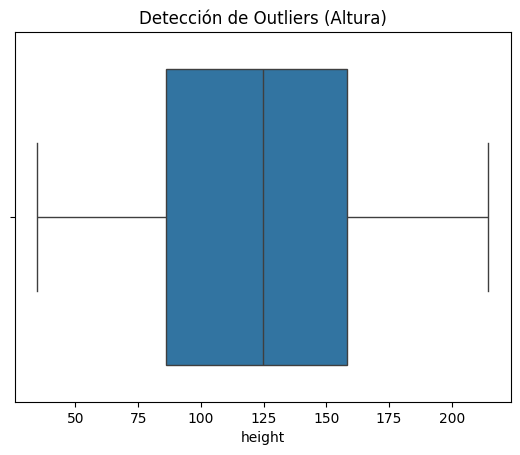

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar boxplot
sns.boxplot(x=df['height'])
plt.title("Detección de Outliers (Altura)")
plt.show()


In [72]:
from sklearn.ensemble import IsolationForest

# Entrenar Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
data['outlier'] = iso_forest.fit_predict(data[['age', 'height']])

# Filtrar outliers
outliers_ml = data[data['outlier'] == -1]
print("Outliers según Isolation Forest:\n", outliers_ml)

df_cleaned = data[(data['height'] >= lower_bound) & (data['height'] <= upper_bound)]
df_cleaned

Outliers según Isolation Forest:
            age      height  outlier
8     0.670382   48.003510       -1
23    0.010343   64.944917       -1
40    0.279671   37.171442       -1
42   17.395967  159.899872       -1
49    0.576683   47.447234       -1
57    0.062935   52.844207       -1
73   16.578184  210.908015       -1
100   0.232134   46.367274       -1
117  17.967096  197.531529       -1
144  17.930935  208.221626       -1
170   0.094584   54.611506       -1
193  17.517262  210.037822       -1
215  15.822224  200.394611       -1
219   0.170508   46.934964       -1
237   7.728228  145.734818       -1
253  17.884282  196.249005       -1
322   0.363614   49.661844       -1
336  17.958863  214.538955       -1
347  17.562532  202.393276       -1
348   0.661630   41.002051       -1
403  17.965687  206.797214       -1
405  17.584869  198.855469       -1
415   0.013991   58.962352       -1
419  16.928809  200.483513       -1
447   0.839021   46.825054       -1
566  17.945600  210.422479    

,age,height,outlier
0,7.503300,91.379984,1
1,6.561946,111.510033,1
2,7.555379,116.724103,1
3,12.900155,146.281398,1
4,10.618378,144.644949,1
...,...,...,...
995,14.843933,162.163852,1
996,4.668705,93.121141,1
997,14.072581,168.879814,1
998,4.871773,86.467273,1
